# Customer Lifetime Value Analysis for Segmented Customer Segments

In [4]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#DATA COLLECTION
df=pd.read_csv('comprehensive_mutual_funds_data.csv',encoding='unicode_escape')

In [6]:
df.shape

(814, 20)

In [7]:
pd.isnull(df).sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(647, 20)

In [10]:
df[df.duplicated()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647 entries, 0 to 812
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    647 non-null    object 
 1   min_sip        647 non-null    int64  
 2   min_lumpsum    647 non-null    int64  
 3   expense_ratio  647 non-null    float64
 4   fund_size_cr   647 non-null    float64
 5   fund_age_yr    647 non-null    int64  
 6   fund_manager   647 non-null    object 
 7   sortino        647 non-null    object 
 8   alpha          647 non-null    object 
 9   sd             647 non-null    object 
 10  beta           647 non-null    object 
 11  sharpe         647 non-null    object 
 12  risk_level     647 non-null    int64  
 13  amc_name       647 non-null    object 
 14  rating         647 non-null    int64  
 15  category       647 non-null    object 
 16  sub_category   647 non-null    object 
 17  returns_1yr    647 non-null    float64
 18  returns_3yr    

In [12]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,525.732612,3040.060278,0.762226,4397.423941,9.476043,4.544049,2.684699,4.099845,18.802473,9.490726
std,367.254644,2596.853800,0.481949,7802.688417,1.429119,1.710691,1.465643,7.148638,11.954839,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.350000,236.500000,10.000000,3.000000,2.000000,1.600000,6.500000,6.700000
50%,500.000000,5000.000000,0.670000,1272.000000,10.000000,6.000000,3.000000,4.400000,18.900000,8.900000
75%,1000.000000,5000.000000,1.080000,5013.500000,10.000000,6.000000,4.000000,5.600000,27.550000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [13]:
df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

In [14]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking&Financial Services-Dir...,1000,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.24,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,5.3,24.6,9.2


In [15]:
 df.columns

Index(['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio',
       'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd',
       'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category',
       'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr'],
      dtype='object')

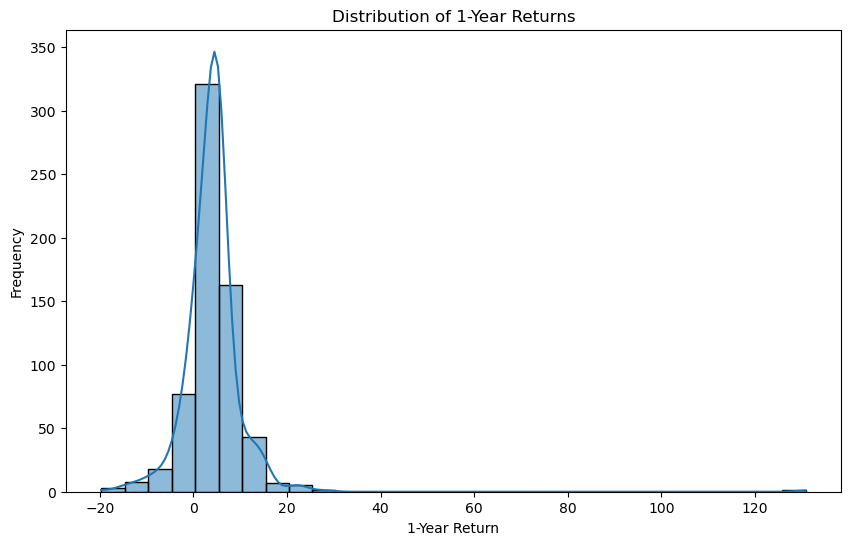

In [16]:
# 1. Performance Analysis
# Example: Plot the distribution of returns
plt.figure(figsize=(10, 6))
sns.histplot(df['returns_1yr'], bins=30, kde=True)
plt.title("Distribution of 1-Year Returns")
plt.xlabel("1-Year Return")
plt.ylabel("Frequency")
plt.show()

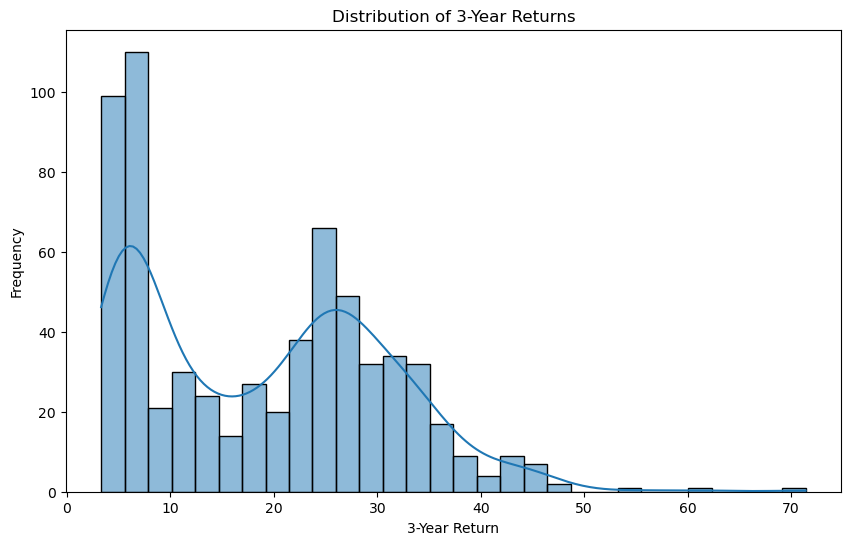

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['returns_3yr'], bins=30, kde=True)
plt.title("Distribution of 3-Year Returns")
plt.xlabel("3-Year Return")
plt.ylabel("Frequency")
plt.show()

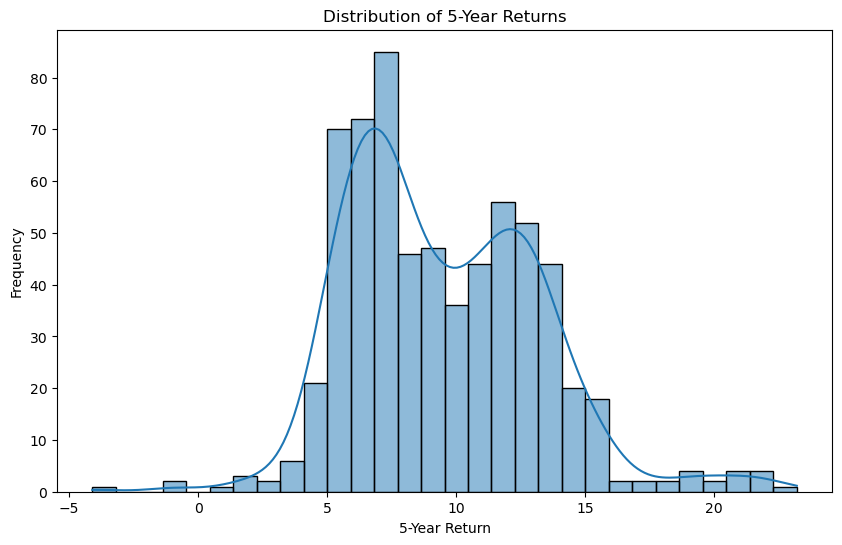

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['returns_5yr'], bins=30, kde=True)
plt.title("Distribution of 5-Year Returns")
plt.xlabel("5-Year Return")
plt.ylabel("Frequency")
plt.show()

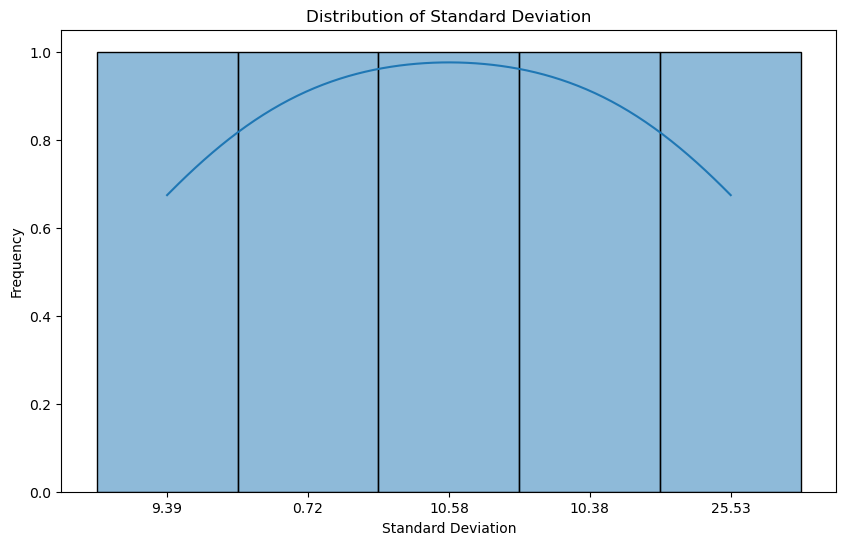

In [19]:
# 2. Risk Assessment
# Example: Plot the distribution of standard deviation
plt.figure(figsize=(10, 6))
sns.histplot(df['sd'].head(5), bins=30, kde=True)
plt.title("Distribution of Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.show()

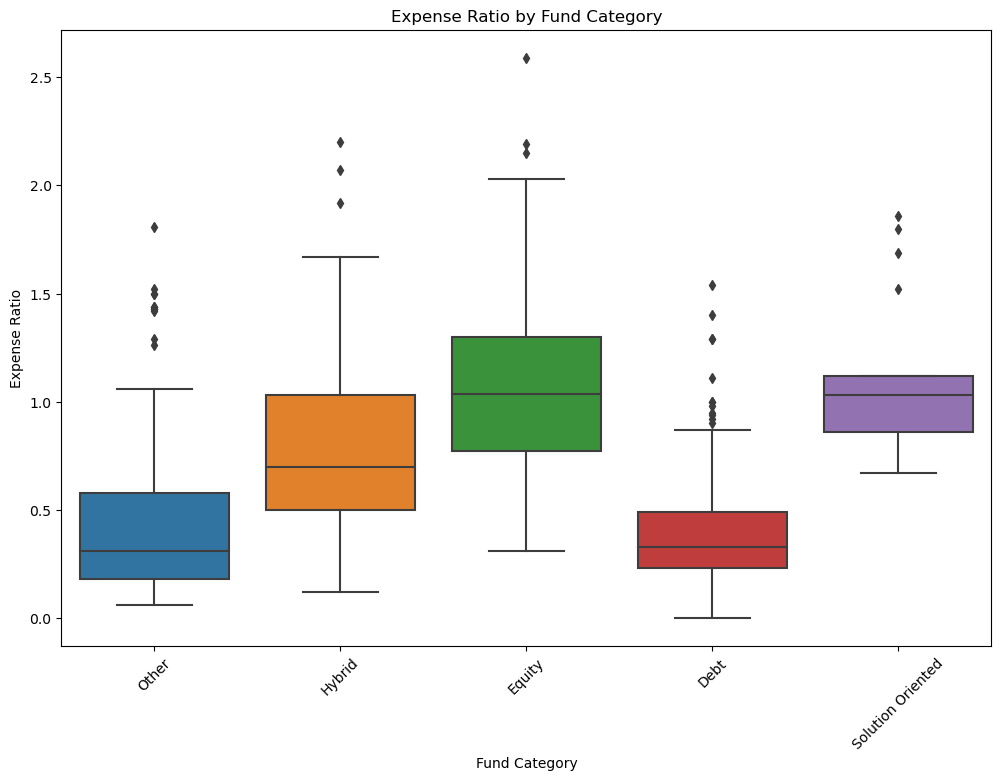

In [20]:
# 3. Fund Characteristics
# Example: Boxplot of expense ratio by fund category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='expense_ratio', data=df)
plt.title("Expense Ratio by Fund Category")
plt.xlabel("Fund Category")
plt.ylabel("Expense Ratio")
plt.xticks(rotation=45)
plt.show()

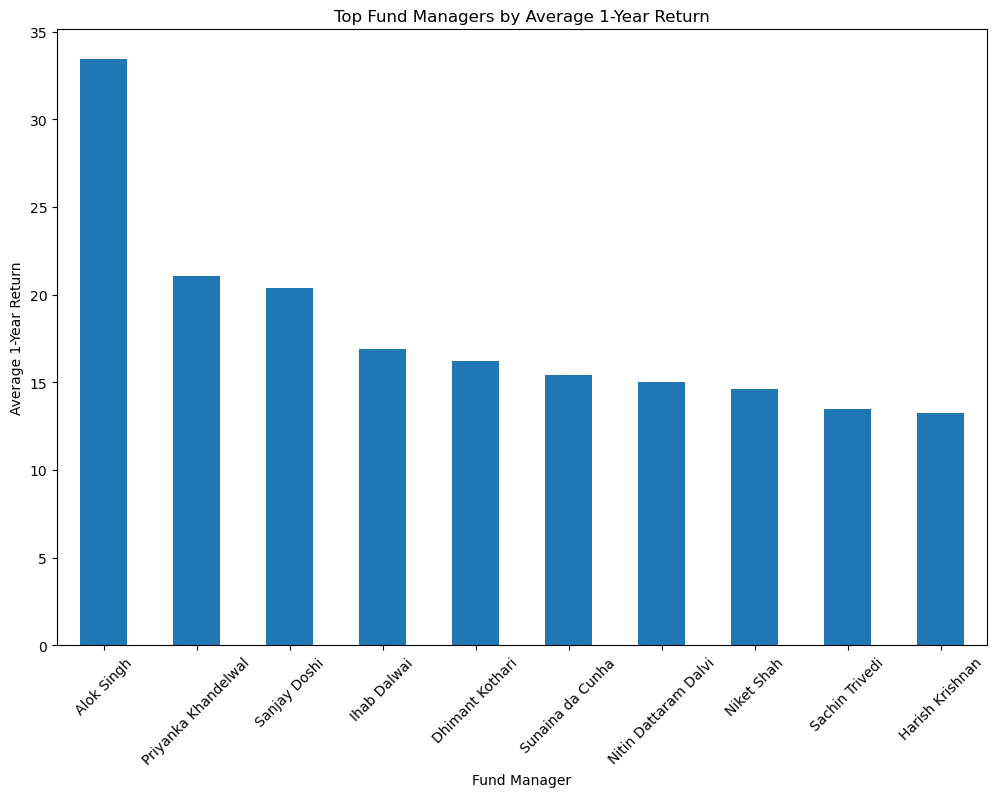

In [23]:
# 4. Fund Manager Analysis
# Example: Top fund managers by average returns
top_fund_managers = df.groupby('fund_manager')['returns_1yr'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
top_fund_managers.plot(kind='bar')
plt.title("Top Fund Managers by Average 1-Year Return")
plt.xlabel("Fund Manager")
plt.ylabel("Average 1-Year Return")
plt.xticks(rotation=45)
plt.show() 

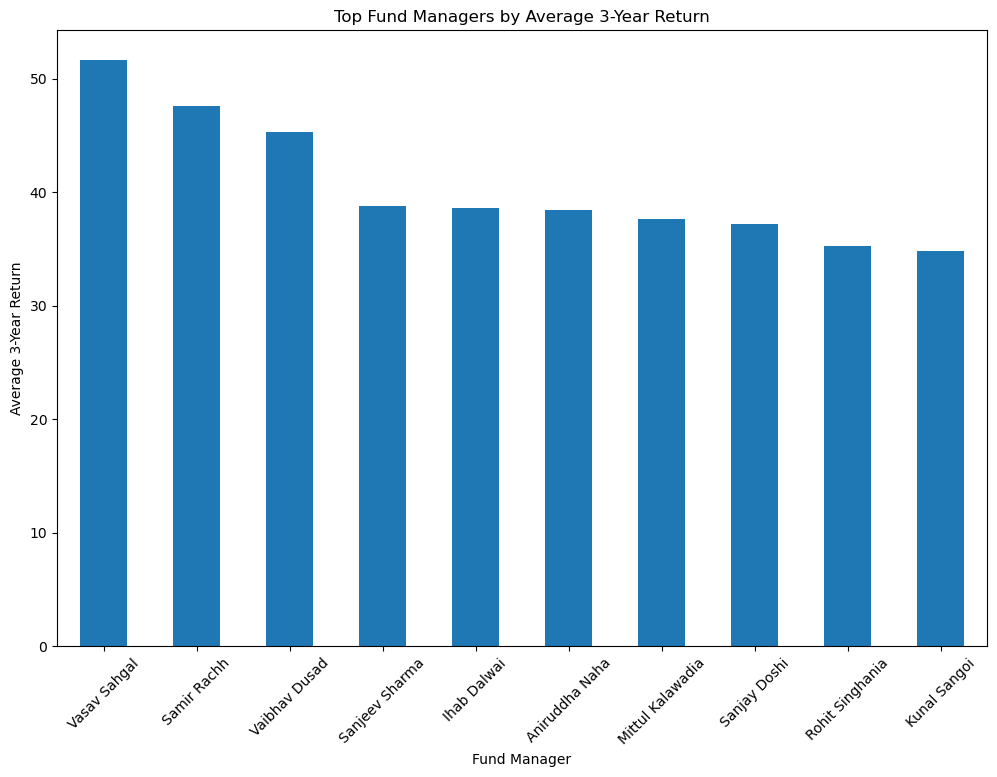

In [24]:
top_fund_managers = df.groupby('fund_manager')['returns_3yr'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
top_fund_managers.plot(kind='bar')
plt.title("Top Fund Managers by Average 3-Year Return")
plt.xlabel("Fund Manager")
plt.ylabel("Average 3-Year Return")
plt.xticks(rotation=45)
plt.show()

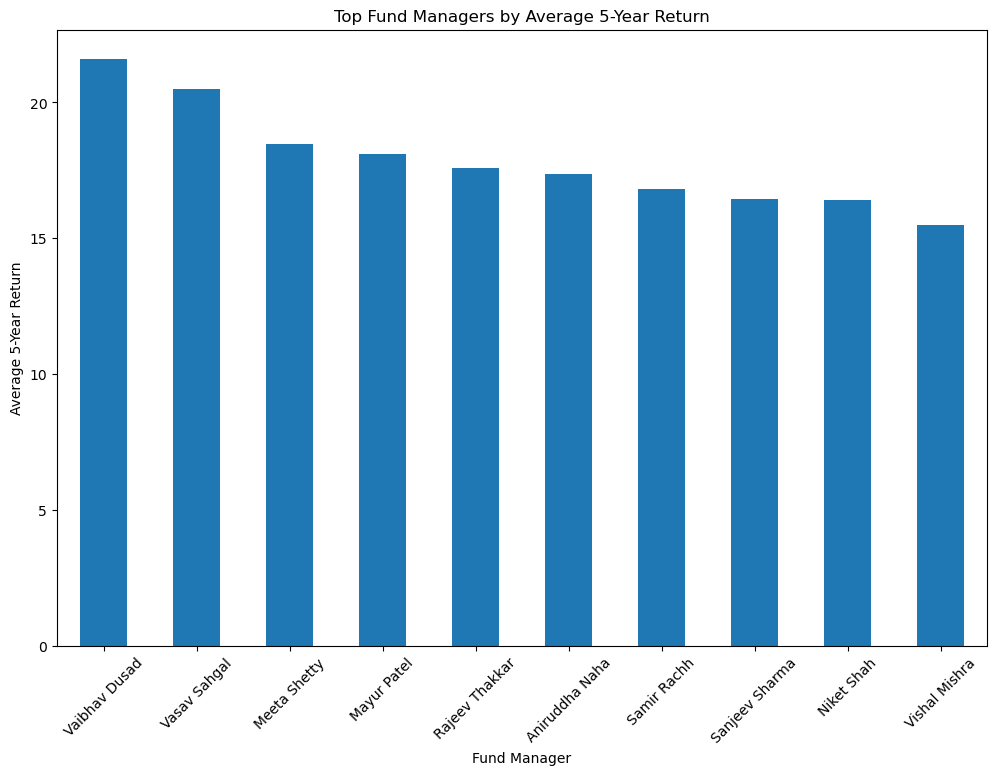

In [25]:
top_fund_managers = df.groupby('fund_manager')['returns_5yr'].mean().nlargest(10)
plt.figure(figsize=(12, 8))
top_fund_managers.plot(kind='bar')
plt.title("Top Fund Managers by Average 5-Year Return")
plt.xlabel("Fund Manager")
plt.ylabel("Average 5-Year Return")
plt.xticks(rotation=45)
plt.show() 

# THANK YOU!
### CONNECT WITH ME:
#### LinkedIn: www.linkedin.com/in/harshita-sharma-b68154220
#### GitHub: https://github.com/DATAPREDICTS